In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [103]:
data['Brand'] = data['CarName'].apply(lambda x: x.split(' ')[0])
data['Brand'] = data['Brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data['Brand'].value_counts()

Brand
toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

# **EDA**

In [104]:
# first tip: drop categorical variables with huge number of unique categories
# second tip: drop variables which almost all of them are in the top category. They won't be informative for our model

data.drop(['car_ID', 'CarName', 'cylindernumber', 'enginetype', 'enginelocation', 'drivewheel', 'carbody', 'doornumber', 'aspiration', 'fueltype', 'fuelsystem'], axis=1, inplace=True)

In [105]:
data.isnull().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
dtype: int64

In [106]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Brand'],
      dtype='object')

In [107]:
data['symboling'].value_counts() 

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Text(0.5, 1.0, 'peakrpm')

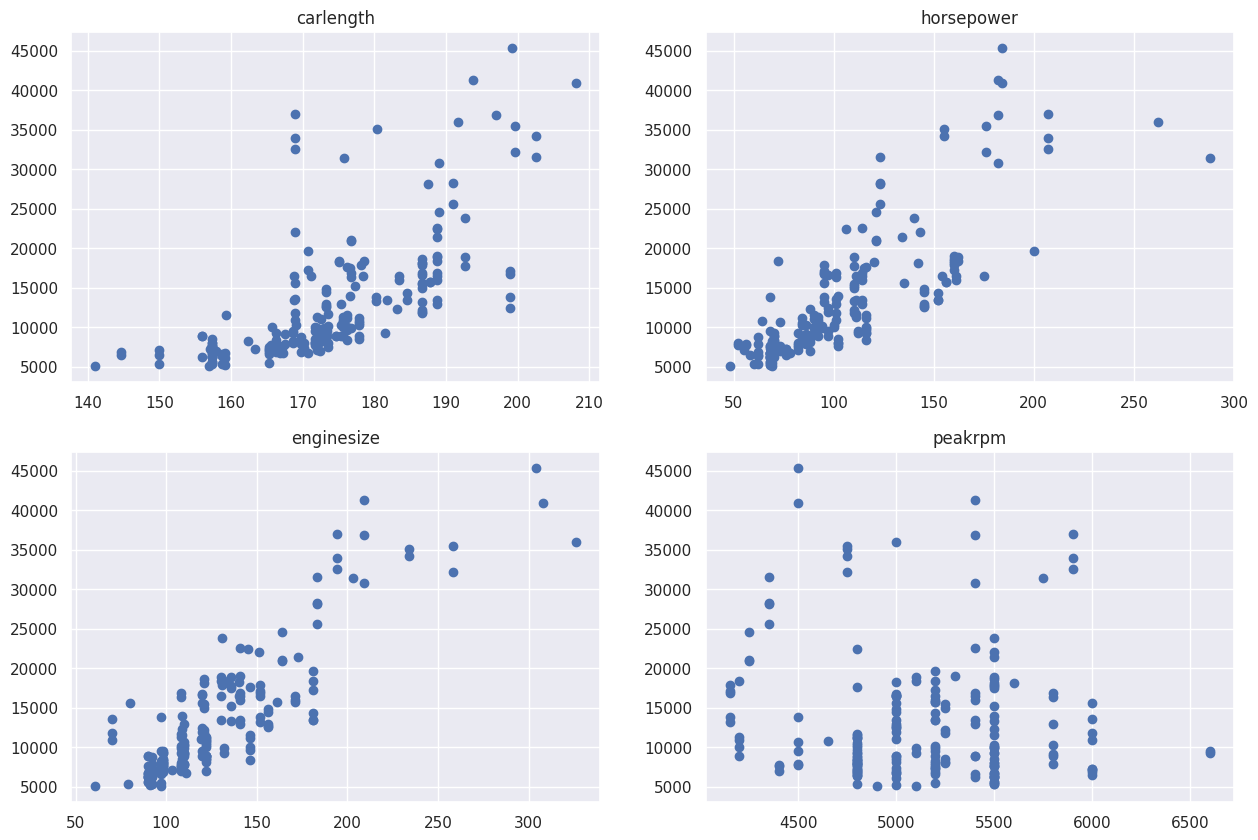

In [108]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
ax1.scatter(data['carlength'], data['price'])
ax2.scatter(data['horsepower'], data['price'])
ax3.scatter(data['enginesize'], data['price'])
ax4.scatter(data['peakrpm'], data['price'])
ax1.set_title('carlength')
ax2.set_title('horsepower')
ax3.set_title('enginesize')
ax4.set_title('peakrpm')

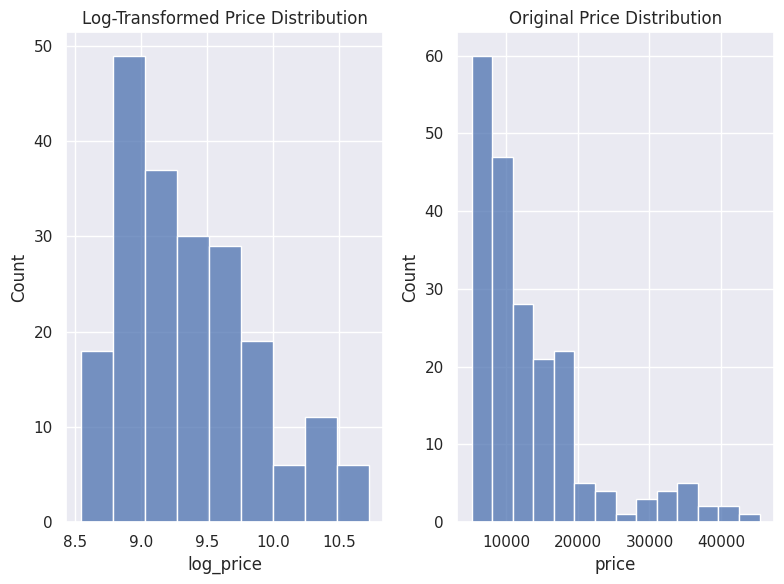

In [109]:
# From above plots it the log transformation will help to get a linear relationship

data['log_price'] = np.log(data['price'])

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plotting log-transformed price distribution
sns.histplot(data['log_price'], ax=axes[0])
axes[0].set_title('Log-Transformed Price Distribution')

# Plotting original price distribution
sns.histplot(data['price'], ax=axes[1])
axes[1].set_title('Original Price Distribution')

plt.tight_layout()
plt.show()

In [110]:
data.drop(['price'], axis = 1, inplace = True)

Text(0.5, 1.0, 'peakrpm')

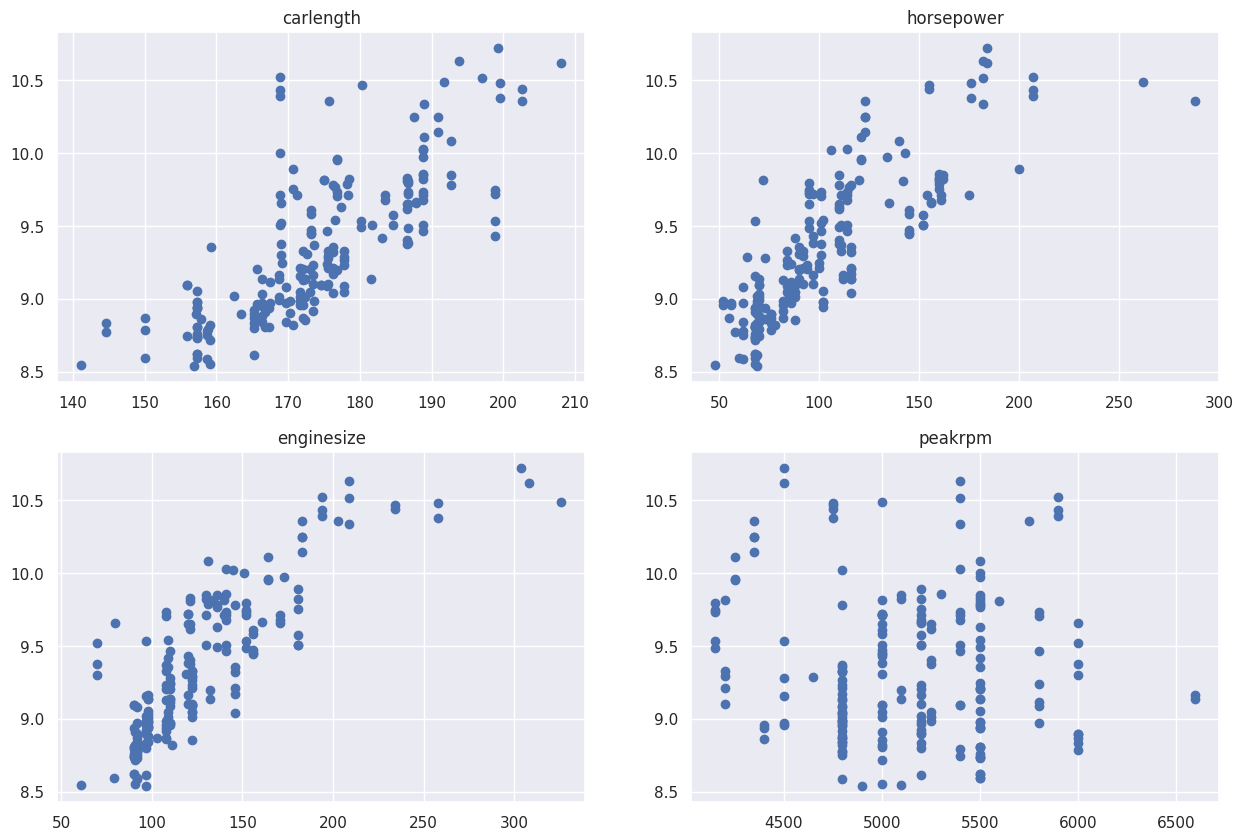

In [111]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
ax1.scatter(data['carlength'], data['log_price'])
ax2.scatter(data['horsepower'], data['log_price'])
ax3.scatter(data['enginesize'], data['log_price'])
ax4.scatter(data['peakrpm'], data['log_price'])
ax1.set_title('carlength')
ax2.set_title('horsepower')
ax3.set_title('enginesize')
ax4.set_title('peakrpm')

**So at the end of OLS assumptions analysis, we consider horsepower and citympg as two numerical predictors**

In [112]:
data_cleaned = data.drop(['wheelbase', 'carlength', 'carwidth','carheight',\
                          'highwaympg', 'curbweight', 'stroke', 'boreratio','peakrpm','enginesize', 'compressionratio'], axis=1)
data_cleaned.columns

Index(['symboling', 'horsepower', 'citympg', 'Brand', 'log_price'], dtype='object')

In [113]:
data_cleaned['symboling'] = data_cleaned['symboling'].astype(str)

In [114]:
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# **Standardizing**

In [115]:
X = data_cleaned.drop('log_price', axis=1)
Y = data_cleaned['log_price']

In [116]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)
scaled_inputs = scalar.transform(X)

# **Training**

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, Y, test_size=0.2, random_state=325)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 28), (41, 28), (164,), (41,))

# Results

In [118]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9233306462700359

# Test

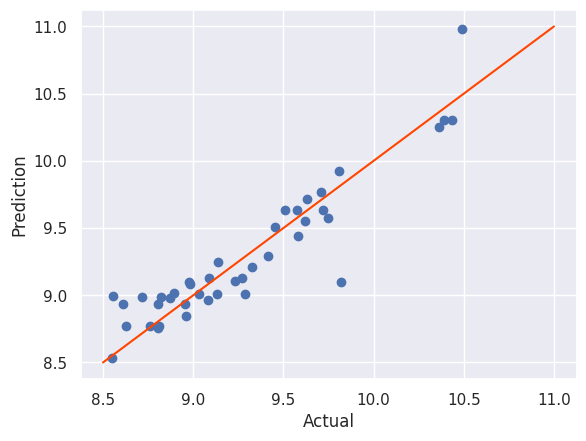

In [119]:
# Check predictions against 45 degree line
y_hat_test = model.predict(x_test)
plt.scatter(y_test, model.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.plot([8.5, 11], [8.5, 11], 'orangered')